# Análisis de gráficos obtenidos

Se procede a analizar los gráficos realizados a través de microstrategy, en los cuales se comparan diversas caracterísitcas de los hilos, con el fin de obtener relaciones que modelen el comportamiento entre los atributos iniciales y el resultado tanto de los likes (Favoritos o FV) y los retweets (RT).

Todos los gráficos se encuentran en el archivo anexo anexo_dossier_muestra.pdf a no ser que se indique lo contrario

In [57]:
import os
import pymongo
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from IPython.display import Image

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Span

output_notebook()

Loading BokehJS ...

In [2]:
#conexion mongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["twitter-memoria"]


In [3]:
coleccion_completa = mydb["nuevos_bi_tweets"]
bd_hilos = mydb["nuevos_bi_hilos"]
bd_usuarios = mydb["nuevos_usuarios"]

all_hilos = [hilo for hilo in bd_hilos.find({})]
all_users = [user for user in bd_usuarios.find({})]
all_tweets = [tweet for tweet in coleccion_completa.find({})]

In [4]:
import pandas as pd

## Dimensiones de estudio

Se consideran 4 dimensiones más importantes: la influencia, el tópico, la emoción y el impacto.

### Influencia
La influencia se considera como el efecto que tiene el autor del hilo en respecto al éxito de la publicación, esta arista posee dos valores importantes, la cantidad de seguidores (Followers) y la relación entre la cantidad de seguidores y seguidos, representada por el puntaje sigmoídeo. El puntaje sigmoídeo representa de forma simple la calidad de la cuenta, puesto que entre mayor a 1 sea el valor, mayor será la cantidad de Followers vs Friends (Seguidos), mientras que más cercano el valor a 0, mayor será la cantidad de Friends vs Followers

### Tópico
El tópico se considera como el tema del que habla el hilo, siendo posible que existan diversos tópicos en un sólo hilo. Estos son reconocidos a través de LDA, el cual entrega un conjunto de tópicos que relacionan todos los documentos de estudio. Al poder existir diversos tópicos en un solo hilo, es posible que el tópico principal no esa el etiquetado, pero es el más cercano de todos los tópicos diseñados por el algoritmo al tema del hilo.

### Emoción
La emoción con la que se escriben los diversos tweets puede ser reconocida a través de diversas técnicas, al unir los tweets en un solo documento, es posible reconocer la emoción del hilo.

Se presentan dos variables de emoción, la emoción Hilo, que es la emoción principal del hilo y la emoción tupla, que son las 2 primeras emociones principales

### Impacto
El impacto se define como el éxito que tiene un hilo en la plataforma social, este fué medido a través de la cantidad de likes (FV) y retweets (RT).



## Análisis de resultados

Primero se analizarán la cantidad de tópicos según algunos atributos, para luego analizar cada dimensión por separado, finalmente se asociarán entre sí las 4 dimensiones para obtener la mayor cantidad de relaciones.

### Variables dignas de definir

Antes de analizar las diversas dimensiones, se explican las variables creadas para el análisis realizado
#### Progreso

Se define como progreso del hilo en que posición relativa al inicio y final del hilo se encuentran los tweets, es decir, si un hilo posee 21 tweets, el tweet 1 es la posición 1, el 11 es la posición 50 y el 21 es la posición 100.

#### Aporte

Se define como aporte de tweet como el porcentaje que representa su cantidad de retweets dentro de la cantidad total de retweets del hilo, es decir, si el tweet tiene 100 RT y el hilo correspondiente tiene 1.000 RT en total, su aporte es 100/1.000 = 0,1



### Hilos

Se analizará la cantidad de hilos según Hashtags, Retweets y el largo del hilo, puesto que son las variables de análisis más revisadas en las diversas dimensiones

#### Cantidad de hilos según HT
![title](graficos/HIL-HT-CANT.png)

Se observa que la gran mayoría de los hilos no posee hashtags.

#### Cantidad de hilos según RT

![title](graficos/HIL-RT-CANT.png)

Se observa que la gran mayoría de los hilos posee una cantidad menor a 10.500 RT.

#### Cantidad de hilos según Largo

![title](graficos/HIL-LRG-CANT.png)

Se observa que el largo de los hilos es bien variado, pero se concentran principalmente entre [4-17]

#### Cantidad de hilos por mes

![title](graficos/HIL-DATE-CANT.png)

Se observa que los hilos aumentan según más reciente sea la fecha, por lo que se considera que el dataset es novedoso.   

#### Progreso vs RT tweet

![title](graficos/HIL-PRG-RT.png)

Se excluye el primer y último tweet del gráfico debido a que son los tweets más populares, lo cual no permitía observar de buena manera los demás valores.

Se aglomera en rangos de 6, esto para facilitar la vista, al realizar este ajuste no se observaron mayores pérdidas de información. Se eligió este rango debido a que el largo promedio es 15, por lo que se buscaba tener una cantidad similar de intervalos al largo promedio.

Se puede observar que el comportamiento es similar entre intervalos, por lo que no se concluye ninguna tendencia.


### Influencia

El puntaje sigmoídeo y la cantidad de seguidores presentaron un comportamiento muy similar, por lo que sólo se presentan los resultados del puntaje sigmoídeo para la mayoría de los atributos y se realiza un análisis de la distribución de la cantidad total de followers.

#### Puntaje sigmoídeo vs cantidad de hilos
![title](graficos/INF-SGM1-CANT.png)

Se analiza la distribución de hilos según el puntaje sigmoídeo del autor, observandose que los usuarios que más hilos escriben son los pertenencientes a [0.8-1.4]

#### Puntaje sigmoídeo vs largo del hilo
![title](graficos/INF-SGM1-LRG.png)

Se observa que si bien los largos varían según el puntaje del usuario, estos se mantienen entre 12 y 16.

#### Puntaje sigmoídeo vs cantidad HT
![title](graficos/INF-SGM1-HT.png)

Se observa que en promedio los hilos están asociados a muy pocos Hashtags cuando se analiza según puntaje sigmoídeo, exceptuando al valor 0.8, por lo que se asume que si bien la mayoría de los usuarios usa los HT de forma similar, las cuentas de menor calidad usan HT de forma más indiscriminada

#### Puntaje sigmoídeo vs fecha (Mes)
![title](graficos/INF-SGM1-DATE.png)

Se observa una tendencia a la alza mientras progresa la fecha, lo que indica que la muestra es reciente.

#### Distribución Followers
![title](graficos/FWR.png)

Se observa que existen pocos usuarios con muchos seguidores y la gran mayoria con pocos.

#### Distribución de Log(Followers)
![title](graficos/INF-LFWR.png)

Se observa que al normalizar los followers el decrecimiento se volvió más constante.
(Desarrollo del gráfico al final del anexo)

#### Distribución de promedio RT según Usuario verificado
![title](graficos/INF-VER.png)

Se observa que la calidad de verificado presenta un promedio superior de RT por sobre los no verificados

### Tópico

En esta dimensión solo se posee un atributo llamado tópico, el cual fue etiquetado a través de LDA.

#### Cantidad de hilos por tópico

![title](graficos/TOP-TOP-CANT.png)

Se observa que el tópico 4 posee la mayor cantidad de hilos superando los 80, por lo que se asume como un tema más genérico, mientras que el resto mayoritariamente posee menos de 20 hilos, por lo que se asume más específico.

#### Cantidad de hilos por tópico cada mes

![title](graficos/TOP-TOP-DATE-CANT.png)

Se observa que el tópico 4 está presente de forma recurrente a través del tiempo, mientras que los demás tienen periodos de tiempo más cortos de interés. Esto complemente el gráfico anterior, reforzando la idea del tópico 4 como tema general.

#### Cantidad de HT por cada tópico

![title](graficos/TOP-TOP-HT.png)

Se observa que al igual que el puntaje sigmoídeo, la cantidad de hashtags es pequeña en todos los tópicos, no se notan tendencias de que la cantidad de HT dependa del tópico hablado

#### Largo del hilo según tópico


![title](graficos/TOP-TOP-LRG.png)

Se observa al igual que en SGM1, el largo promedio de los hilos por tópico es 15, indicando que el tópico por si sólo no presenta una tendencia de extensión.

### Emoción 

Se poseen 3 atributos de emoción, la emoción del Tweet, la emoción del hilo y la tupla de la primera y segunda emoción del hilo, pero de manera inicial sólo se estudia la emoción del hilo.

El algorítmo de reconocimiento entrega una probabilidad de cada emoción, por lo que se considera la primera y segunda probabilidad como primera y segunda emoción para la tupla emoción.

#### Cantidad de hilos según emoción

![title](graficos/EMO-HEMO-CANT.png)

Se observa que la gran mayoría de los hilos presenta como primera probabilidad la emoción Alegría y como segunda mayoría Miedo.

#### Cantidad de HT según emoción

![title](graficos/EMO-HEMO-HT.png)

Al igual que los ítems anteriores, la cantidad de HT es muy pequeña en todos, también se observa que el comportamiento es similar a la cantidad de hilos según emoción, considerando que la mayoría de los hilos no posee HT, es importante destacar que las emociones Alegría y Miedo están muy cerca del valor 1.  

#### Largo según emoción

![title](graficos/EMO-HEMO-LRG.png)

Se observa que al contrario con los otros ítems, el largo promedio del hilo aumenta cuando se clasifican según emoción, por lo que se asume que los hilos más cortos están mejor distribuidos entre todas las emociones en conjunto con los más largos.

#### Emoción vs progreso

![title](graficos/EMO-TEMO-PRG.png)

Si bien de manera inicial se observan unos valores claramente mayores en ciertas posiciones, luego de analizar la cantidad de hilos según cada emoción, se observa que los peaks solo se presentan en las emociones con menos cantidad de hilos, mientras que en las más populares, no existe una tendencia clara. Lo anterior se puede explicar debido a que la cantidad de hilos suaviza los máximos y minimos, por lo que se asume que no hay mayores tendencias.

### Impacto

Tal como se definió anteriormente, el impacto se entiende como el desempeño que presenta el conjunto de tweets que conforman el hilo, por lo que se calcula la cantidad total de RT y FV sumando el total de cada tweet. 

#### Distribución de RT
![title](graficos/IMP-RT.png)

Se observa que pocos hilos poseen un valor muy alto de total RT

#### Distribución de Log(RT)
![title](graficos/IMP-LRT.png)

Se observa que la disminución de total RT se normalizó luego de aplicar Log


#### Distribución de Promedio RT
![title](graficos/IMP-PRT.png)
Se observa que pocos hilos poseen un valor muy alto de promedio RT

#### Distribución de Log(Promedio RT)
![title](graficos/IMP-LPRT.png)

Se observa que la disminución de Promedio RT se normalizó luego de aplicar Log

#### Promedio FV según promedio RT

![title](graficos/IMP-BRT-BFV.png)
![title](graficos/IMP-LRT-LFV.png)

Se observa una relación de potencia entre los favoritos y retweets obtenidos en total por el hilo. 
(Desarrollo del gráfico y linea de tendencia en el anexo al final del documento)


Luego del análisis, se observa que la relación entre FV y RT es muy similar, por lo que para efectos prácticos la mayor cantidad de las veces se presentará sólo el promedio RT a no ser de que se especifique lo contrario.


#### Promedio de RT según largo

![title](graficos/IMP-LRG-RT.png)

Se observa que si bien el comportamiento es disperso, hay una leve tendencia de aumentar la cantidad de RT según el aumento del largo, pero el comportamiento en general no tiene relación concluyente con el largo propiamente tal.

#### Promedio de RT según Fecha

![title](graficos/IMP-DATE-RT.png)

Se observa que si bien el promedio de RT sigue una tendencia similar a la cantidad de hilos por mes, existen dos meses en los cuales aumenta considerablemente los RT, por lo que se debe analizar más al respecto de la fecha y otras aristas.

#### Promedio de RT según HT

![title](graficos/IMP-HT-RT.png)

Sabiendo que la gran mayoría de los hilos poseen 0 HT, que existan promedios similares a 0 (4, 6 y 10) significa que el uso de HT tiene un aporte digno de estudiar más adelante.

#### Promedio de Aporte RT según progreso

![title](graficos/IMP-PRG-ART.png)

Se observa que el aporte realizado por cada tweet en el progreso del hilo es similar en todo momento, exceptuando en el inicio y final, donde se observa un gran declive en el comportamiento, por lo que se deben realizar mayores análisis respecto a este atributo.


### Tópico vs Impacto

Se analizará la relación que presenta el impacto según el tópico del hilo. Debido a la cantidad de hilos según tópico varía entre 7 y 88, se pondrá especial atención a los tópicos 0, 2, 4, 7 y 9, puesto que estos poseen más de 20 hilos distintos, pero de igual forma se presentarán todos los tópicos en los gráficos.

####  Relación entre Tópico y RT vs FV

![title](graficos/TXI-TOP-RT-FV.png)

Se observa que el tópico 2 presenta un valor tanto de RT como FV vastamente mayor en comparación a los demás tópicos, además, recordando que el tópico 4 el que posee la mayor cantidad de hilos (80+), se puede asumir de forma inicial que el promedio de RT para los hilos debiese ser similar al suyo, además de esto, tanto el tópico 9 y 2 poseen una cantidad similar superior a los 20, pero ambos presentan una gran diferencia en el promedio, por lo que el valor del tópico 2 es más destacable que de manera inicial. 

#### Relación entre promedio RT y Tópico vs Largo hilo

![title](graficos/TXI-TOP-LRG-RT.png)

Considerando los colores como la distribución de cantidad de Hilos en el bloque y el tamaño como la distribución del promedio RT, se observa que la mayoría de las combinaciones con mayor promedio RT son las que poseen sólo 1 o 2 hilos, exceptuando la combinación (2,10), la cual promedia 111.191,33 RT entre 3 hilos.

#### Relación entre promedio RT y Tópico vs cantidad de HT

![title](graficos/TXI-TOP-HT-RT.png)

Considerando los colores como la distribución de cantidad de Hilos en el bloque y el tamaño como la distribución del promedio RT, se observa que la gran mayoría del tópico 2 no posee HT y que el éxito del hilo según el tópico no depende de la cantidad de HT utilizados.

#### Relación entre promedio RT y Tópico vs Fecha (Mes)

![title](graficos/TXI-TOP-DATE-RT.png)

Considerando los colores como la distribución de cantidad de Hilos en el bloque y el tamaño como la distribución del promedio RT, no se pueden concluir relaciones debido a la calidad de los valores más grandes




### Emoción vs Impacto

#### Emoción vs RT vs FV

Como existen dos variables de emoción, se estudiarán ambos comportamientos en el mismo apartado.

##### Emoción

![title](graficos/EXI-RT-FV.png)

De manera inicial, se observa que RT y FV siguen la misma relación entre ambas, sin importar la emoción.

Se observa que tanto Tristeza como Sorpresa poseen un resultado excelente en comparación con las demás emociones. También es posible reconocer Alegría y Miedo siendo las emociones más comunes poseen los resultados más bajos.

##### Emoción tupla

![title](graficos/EXI-RT-FV-TUP.png)

Luego de excluir Sadness-Fear y Surprise-Fear, se observa un comportamiento similar entre cada una de las barras, pero aún así se resalta Sadness-Surprise.

#### Promedio RT según Emoción vs HT

![title](graficos/EXI-HEMO-HT-RT.png)

Se observa que la gran mayoría de las emociones utiliza entre 0 y 1 HT, se observan algunas combinaciones de mayor cantidad de HT y emociones con buen resultado, pero poseen solo entre 1 a 3 hilos, por lo que no es concluyente.

También es posible concluir que utilizar a lo menos 1 HT si mejora el impacto.

#### Otras combinaciones

Las demás asociaciones presentadas en el anexo no se consideraron concluyentes ni que aportaran nuevas observaciones.

### Influencia vs Impacto

#### Distribución de hilos y RT según puntaje sigmoídeo vs Followers

![title](graficos/IXI-SGM-FLWR-CANT-RT.png)

En el gráfico de la izquierda se observa que la gran mayoría de los hilos fue escrito por los usuarios más promedio, mientras que los hilos más exitosos fueron escritos por cuentas más populares y de mejor calidad.

Se observa que sobre 170.000 Followers es muy probable tener un valor alto de RT

#### Promedio RT y FV según puntaje sigmoídeo

![title](graficos/IXI-SGM-RT-FV.png)

Se observa que puntajes superiores a 1 poseen un mejor resultado en RT y FV, pero sin una mayor relevancia entre ellos.

![title](graficos/IXI-SGM-RT.png)

Se corrobora la relación entre puntajes superiores a 1, siendo muy relevante entre 1,5 y 1,8.

#### Promedio RT y FV según Followers

![title](graficos/IXI-FWR-RT-FV.png)

Se observa que si bien hay una leve tendencia a la alza, no es concluyente.

#### Promedio RT según puntaje sigmoídeo vs largo

![title](graficos/IXI-SGM-LRG-CANT-RT.png)

En el gráfico de la izquierda se observa que la mayoría de los hilos se encuentran en los rangos SGM[0.7-1.4] y LRG[4-16].
En el gráfico de la derecha se observa que la única combinación segura es (1.3 , 10), mientras que las demás no poseen suficientes hilos como para ser concluyentes. 


#### Otras combinaciones

Las demás asociaciones presentadas en el anexo no se consideraron concluyentes ni que aportaran nuevas observaciones.

### Influencia vs Emoción

#### Puntaje sigmoídeo vs Emoción

![title](graficos/IXE-HEMO-SGM.png)

Se observa que todas las emociones tienen un promedio de puntaje sigmoídeo superior a 1, lo que indica que la muestra está bien distribuida al promediar valores cercanos al promedio general del puntaje sigmoídeo.

#### Promedio RT según puntaje sigmoídeo vs Emoción

![title](graficos/IXE-SGM-HEMO-RT.png)

Se observa que en general todas las emociones aumentan su promedio RT en valores superiores del puntaje sigmoídeo, siendo los de mejor valor tristeza, sorpresa y felicidad



### Tópico vs Emoción

#### Distribución RT según tópico y emoción

![title](graficos/TXE-TOP-HEMO-RT.png)

Se observa que el tópico 4 posee valores similares para las emociones presentes, respaldando la idea de ser el tópico más amplio.

Se observa también que no hay una emoción dominante transversalmente entre tópicos.
(Anger 1, Fear 2, Disgust 3, Sadness 3, Joy 5)

#### Promedio RT según tópico vs emoción

![title](graficos/TXE-HEMO-TOP-RT.png)

En el gráfico de la izquierda se presenta la recurrencia de hilos según tópicos y emociones, se observa que Alegría predomina en todos los tópicos.

Anger posee una muestra muy poco representativa en todos los tópicos

Se observa que el tópico 2 posee un buen rendimiento en todas las emociones que posee.

El único tópico donde sobresale Joy es el 3

Los tópicos donde mejor se desempeña Fear son 2, 10 y 11

### Tópico vs Influencia

#### Promedio puntaje sigmoídeo según tópico

![title](graficos/TXI-TOP-SGM.png)

Se observa que la gran mayoría de los tópicos superan el puntaje sigmoídeo 1, siendo el promedio de 1,12. 


#### Promedio Hilo y RT según tópico vs puntaje sigmoídeo

![title](graficos/TXI-TOP-SGM-CANT-RT.png)

Tal como fue mencionado en unos apartados anteriores, se observa que la mayoría de los tópicos fueron escritos por usuarios con puntaje menor a 1.1 y que el tópico 4 es muy amplio.

También se observa que sin importar el tópico, mientras mayor sea el puntaje sigmoídeo, mayor es el éxito del hilo.




## Relaciones descubiertas

### Tópicos

El tópico 4 es demasiado amplio, hay que analizar en profundidad

### Influencia

la mayoria son [0,8 - 1,4]

### Emocion

La mayoria son Joy o Fear

### Impacto

Los HT presentan una relación a estudiar

Tanto el inicio como el final del hilo presenta una disminución del aporte de RT.

Abril 2018 y Abril 2019 son importantes

### Tópico vs Impacto

Es importante revisar en mayor detención el tópico 2

Tópico 2 con largo 10 le va bien

Abril 2019 es importante tanto en fecha vs RT y fecha vs RT vs Topico. Posee 3 hilos en distintos tópicos que le va muy bien.

### Emoción vs Impacto

Alegría y Miedo les va mal.
Tristeza y Sorpresa les va bien.
les va muy bien a Sadness-Fear y Surprise-Fear (pocos hilos)
le va bien a Sadness en todo tipo de emoción
1 HT también da buenos resultados.

### Influencia vs Impacto

mayor calidad de cuenta, mejor, 1.5 - 1.8 mejor proporción

### Influencia vs Emoción 

Se observa que a las emociones les empieza a ir bien en puntajes sigmoideos mayores a 1.1

### Tópico vs Emoción 

Topico 2 le va bien en todas las emociones
Topico 3 es el único donde le va excelente a Joy

### Tópico vs Influencia

Mayor puntaje sigmoídeo, mayor RT, sin importar tópico

### Atributos importantes

Finalmente se reconocen como los atributos más importantes para el análisis según las relaciones encontradas:

- Puntaje Sigmoídeo
- RT
- Tópico
- Tupla Emoción
- Followers
- Total HT
- User Verificado
- total tweets (Largo)

No se considerará la fecha, puesto que si bien se observaron algunas tendencias, la mayoría de las relaciones producidas por esta no entregaban mayor información y no se incluyeron en este informe.


# Anexo

## Gráfico RT - FV

In [58]:
df_hilo = pd.DataFrame(all_hilos).sort_values(by = ["total_retweets"], axis = 0)
for i in range(5):
    df_hilo = df_hilo.drop(df_hilo['total_favoritos'].idxmax())
all_rt = df_hilo["total_retweets"].tolist()
all_fv = df_hilo["total_favoritos"].tolist()

log_rt = [np.log10(valor+1) for valor in all_rt]
log_fv = [np.log10(valor+1) for valor in all_fv]

z = np.polyfit(log_rt, log_fv, 1)
p = np.poly1d(z)
log_trend = [(z[0]*valor + z[1]) for valor in log_rt]
print("Y = %.6f X + (%.6f)"%(z[0],z[1]))

Y = 0.957083 X + (0.603310)


In [49]:
grafico = figure(plot_width=700, 
           plot_height=350, 
           title='Relación entre FV y RT', 
           background_fill_color="#f2f3f7", 
           y_axis_label='Favoritos', 
           x_axis_label='Retweets')

grafico.circle(all_rt, all_fv,line_color='#ff00db')
#grafico.line(all_rt, trend,line_color='#ff00db')

show(grafico)

In [51]:
grafico = figure(plot_width=700, 
           plot_height=350, 
           title='Relación logarítmica entre FV y RT', 
           background_fill_color="#f2f3f7", 
           y_axis_label='Log10 Favoritos', 
           x_axis_label='Log10 Retweets')

grafico.circle(log_rt, log_fv,line_color='#ff00db')
grafico.line(log_rt, log_trend,line_color='#ff00db')
show(grafico)

## Gráfico de User vs Log(FWR)

In [31]:
df_user = pd.DataFrame(all_users).sort_values(by = ["followers_count"], axis = 0, ascending=False)

all_id = df_user["id"].tolist()
all_fwr = df_user["followers_count"].tolist()

log_fwr = [np.log10(valor+1) for valor in all_fwr]
log_id = [np.log10(valor+1) for valor in all_id]

In [33]:
grafico = figure(plot_width=700, 
           plot_height=350, 
           title='Distribución Followers', 
           background_fill_color="#f2f3f7", 
           y_axis_label='FWR')

grafico.circle(range(0,len(all_id)), all_fwr,line_color='#ff00db')
#grafico.line(all_rt, trend,line_color='#ff00db')

show(grafico)

In [136]:
df_hilos = pd.DataFrame(all_hilos)
variable= "promedio_retweets"
df_hilos_sin = df_hilos.drop(df_hilos.columns.difference([variable, "total_tweets"]), 1).sort_values(by = variable, ascending=False)

analisis_sin = list(df_hilos_sin[variable])
largo = list(df_hilos_sin["total_tweets"])
analisis = [np.log10(valor+1) for valor in analisis_sin]
df_hilos_sin.describe()

,promedio_retweets,total_tweets
count,274.000000,274.000000
mean,902.850365,14.912409
std,2720.809866,8.157313
min,0.000000,3.000000
25%,34.000000,9.000000
50%,159.500000,13.000000
75%,675.750000,20.000000
max,32704.000000,45.000000


In [137]:
dist = analisis
equis = [valor for valor in range(0,len(dist))]

z = np.polyfit(equis, dist, 1)
p = np.poly1d(z)
log_trend = [(z[0]*valor + z[1]) for valor in equis]
print("Y = %.6f X + (%.6f)"%(z[0],z[1]))

grafico = figure(plot_width=700, 
           plot_height=350, 
           title='Distribución de Log Promedio Retweets según largo', 
           background_fill_color="#f2f3f7", 
           y_axis_label='Log Promedio RT', x_axis_label = "Largo Hilo")

grafico.circle(equis, dist,line_color='blue')
grafico.line(equis, log_trend,line_color='red')


show(grafico)
-0.010761

Y = -0.010761 X + (3.655273)


-0.010761

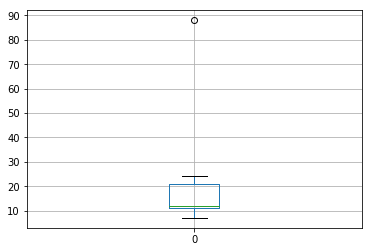

In [64]:
dist = []
for topico in range(0,13,1):
    contador = 0
    for hilo in all_hilos:
        if hilo["topico"] == topico:
            contador +=1
    dist.append(contador)
#del(dist[4])

df_topicos = pd.DataFrame(dist)

df_topicos.boxplot()



In [65]:
grafico = figure(plot_width=700, 
           plot_height=350, 
           title='Distribución Followers', 
           background_fill_color="#f2f3f7", 
           y_axis_label='FWR')

grafico.circle(range(0,len(dist)), dist,line_color='#ff00db')
#grafico.line(all_rt, trend,line_color='#ff00db')

show(grafico)